#Лабораторная работа №4. ОБУЧЕНИЕ С УЧИТЕЛЕМ. ЗАДАЧА КЛАССИФИКАЦИИ.<BR>

In [60]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn. preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metric
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from math import sqrt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?


In [27]:
data = pd.DataFrame([
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
])
data.columns=["weather","walk"]
data

,weather,walk
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [28]:
walk_probably = len(data.loc[(data['weather'] == 'дождь') & (data['walk'] == True)]) / len(data.loc[data['weather'] == 'дождь'])
print(walk_probably)

0.3333333333333333


## Задание 2

предобработка

In [29]:
data=pd.read_csv("../data/weatherAUS.csv")
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [30]:
print(len(data.loc[data['RainToday'] == "Yes"]))
print(len(data.loc[data['RainToday'] == "No"]))

31880
110319


In [31]:
data.dropna(inplace=True,ignore_index=True)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

Думаю что из даты нам нужен только месяц, потому что год и число врядли так влияют на погоду

In [33]:
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f)
data['Date'] = data['Date'].astype(int)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int32  
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

Rain today и Rain Tomorrow переведу в бинарный тип данных

In [35]:
f = lambda x : 0 if (x == "No") else 1
data['RainToday'] = data['RainToday'].transform(f)
data['RainToday'] = data['RainToday'].astype(int)

data['RainTomorrow'] = data['RainTomorrow'].transform(f)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)

In [36]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,1,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,1,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,1,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,6,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,6,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,6,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int32  
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [38]:
data['Location'].unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [39]:
data['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

К сожалению остались 4 столбца с ктегориальными данными, они не упорядоченные поэтому не могу использовать OrdinalEncoder
а например бинарный энкодер размножит столбцы гораздо сильнее чем горячее кодирование

In [40]:
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [41]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head()

,cat__Location_AliceSprings,cat__Location_Brisbane,cat__Location_Cairns,cat__Location_Canberra,cat__Location_Cobar,cat__Location_CoffsHarbour,cat__Location_Darwin,cat__Location_Hobart,cat__Location_Melbourne,cat__Location_MelbourneAirport,...,cat__WindDir3pm_NNW,cat__WindDir3pm_NW,cat__WindDir3pm_S,cat__WindDir3pm_SE,cat__WindDir3pm_SSE,cat__WindDir3pm_SSW,cat__WindDir3pm_SW,cat__WindDir3pm_W,cat__WindDir3pm_WNW,cat__WindDir3pm_WSW
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
data=data.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)
data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,1,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,1,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,1,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,6,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,6,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,6,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [43]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cat__Location_AliceSprings      56420 non-null  float64
 1   cat__Location_Brisbane          56420 non-null  float64
 2   cat__Location_Cairns            56420 non-null  float64
 3   cat__Location_Canberra          56420 non-null  float64
 4   cat__Location_Cobar             56420 non-null  float64
 5   cat__Location_CoffsHarbour      56420 non-null  float64
 6   cat__Location_Darwin            56420 non-null  float64
 7   cat__Location_Hobart            56420 non-null  float64
 8   cat__Location_Melbourne         56420 non-null  float64
 9   cat__Location_MelbourneAirport  56420 non-null  float64
 10  cat__Location_Mildura           56420 non-null  float64
 11  cat__Location_Moree             56420 non-null  float64
 12  cat__Location_MountGambier      

In [44]:
df = pd.concat([
    data,
    encoded_features
], axis=1)

In [45]:
print(len(df.loc[df['RainTomorrow'] == 1]))
print(len(df.loc[df['RainTomorrow'] == 0]))

12427
43993


In [46]:
df_major_0 = df[df["RainTomorrow"] == 0]
df_minor_1 = df[df["RainTomorrow"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))

# Сбалансированный df
df = pd.concat([df_major_0_undersampled, df_minor_1], axis=0)

print(len(df.loc[df['RainTomorrow'] == 1]))
print(len(df.loc[df['RainTomorrow'] == 0]))

12427
12427


предобработку завершил

In [47]:
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [49]:
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))


## KNN метод

In [50]:
param_grid = {
    "n_neighbors": range(1,10),
    "p": [1, 2],
}

gridseach = GridSearchCV(KNeighborsClassifier(weights="distance", metric='minkowski'), param_grid=param_grid, scoring="f1")
gridseach.fit(X_train, y_train)
gridseach.best_params_

{'n_neighbors': 9, 'p': 1}

In [51]:
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      4057
           1       0.77      0.76      0.76      4145

    accuracy                           0.76      8202
   macro avg       0.76      0.76      0.76      8202
weighted avg       0.76      0.76      0.76      8202



0.7605892866222077

## Naive Bayes

In [53]:
gauss_bayes = GaussianNB()
gauss_bayes.fit(X_train, y_train)

y_pred = gauss_bayes.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.73      0.68      0.71      4057
           1       0.71      0.76      0.73      4145

    accuracy                           0.72      8202
   macro avg       0.72      0.72      0.72      8202
weighted avg       0.72      0.72      0.72      8202



0.718198660641944

## Logistic Regression

In [55]:
gridsearch = GridSearchCV(LogisticRegression(solver="newton-cholesky", max_iter=500), {"C": np.arange(0.1, 1.1, 0.1)}, scoring="f1")
gridsearch.fit(X_train, y_train).best_params_

{'C': 0.6}

In [56]:
logreg = LogisticRegression(C=0.2)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4057
           1       0.81      0.79      0.80      4145

    accuracy                           0.80      8202
   macro avg       0.80      0.80      0.80      8202
weighted avg       0.80      0.80      0.80      8202



0.8036809303373846

## SVM

In [58]:
#param_grid = {
#    "C": np.arange(0.1, 0.5, 1),
#    "kernel": ("linear", "poly", "rbf"),
#    "degree": (2, 3, 4),  
#}

#gridsearch = GridSearchCV(SVC(), param_grid, scoring="f1")
#gridsearch.fit(X_train, y_train).best_params_

In [61]:
svc = SVC(C=0.1, kernel="linear")
svc.fit(X_train, y_train)                                      
y_pred = svc.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))
metric.roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4057
           1       0.81      0.80      0.81      4145

    accuracy                           0.81      8202
   macro avg       0.81      0.81      0.81      8202
weighted avg       0.81      0.81      0.81      8202



0.805590034410138

## Итоговая модель классификаторов

In [63]:
classifiers = {
    'KNN classifier': KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights="distance"),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(C=0.2),
    'SVC': SVC(C=0.1, kernel="linear")
}


for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred), "\n\n")

KNN classifier
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      4057
           1       0.77      0.76      0.76      4145

    accuracy                           0.76      8202
   macro avg       0.76      0.76      0.76      8202
weighted avg       0.76      0.76      0.76      8202
 


Naive Bayes
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      4057
           1       0.71      0.76      0.73      4145

    accuracy                           0.72      8202
   macro avg       0.72      0.72      0.72      8202
weighted avg       0.72      0.72      0.72      8202
 


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4057
           1       0.81      0.79      0.80      4145

    accuracy                           0.80      8202
   macro avg       0.80      0.80      0.80      8202
weighted avg       0.

## Задание 3

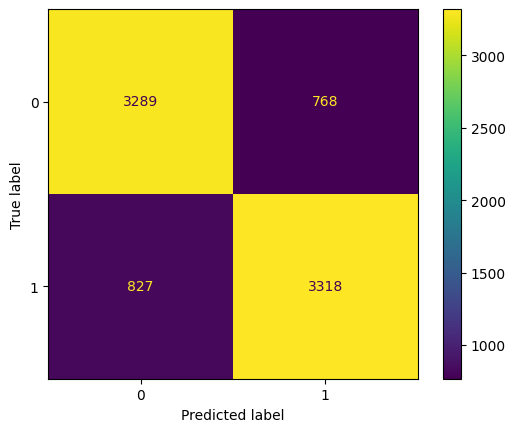

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Precision, Recall, F-мера

* $P$ – число истинных результатов, $P = TP + FN$
* $N$ – число ложных результатов, $N = TN + FP.$


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

In [68]:
def accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return (tp+tn)/(p+n)
print(accuracy_score(y_test, y_pred), accuracy(y_test, y_pred))

0.8055352353084614 0.8055352353084614


In [69]:
def precision(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return tp/(tp+fp)
print(precision_score(y_test, y_pred), precision(y_test, y_pred))

0.8120411160058737 0.8120411160058737


In [70]:
def recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return tp/p
print(recall_score(y_test, y_pred), recall(y_test, y_pred))

0.8004825090470447 0.8004825090470447


In [71]:
def f1(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    p=tp+fn
    n=tn+fp
    return 2/(1/precision(y_test, y_pred)+1/recall(y_test, y_pred))
print(f1_score(y_test, y_pred), f1(y_test, y_pred))

0.8062203863443081 0.8062203863443081


## KNN метод своими ручками

In [73]:
import statistics
from scipy.stats import mode
class KNNMethod:
    def __init__(self, x_train, y_train, k_neighbors):
        self.x_train=x_train.to_numpy()
        self.y_train=y_train.array
        self.k_neighbors = k_neighbors

    def predict(self, x_test):
        x_test=x_test.to_numpy()
        classes=[]
        for test_index, test_predictors in enumerate(x_test):
            distances  = []
            for train_index, train_predictors in enumerate(self.x_train):
                distance=0
                for i in range(len(test_predictors)):
                    distance += (test_predictors[i] - train_predictors[i]) ** 2
                distances.append(
                    [sqrt(distance), self.y_train[train_index]]
                )
            distances.sort(key=lambda x: x[0])
            neighbours = distances[:self.k_neighbors]
            classes.append(mode(np.array(neighbours)[:, 1]).mode)
        return classes

In [74]:
knn = KNNMethod(X_train.iloc[:800], y_train.iloc[:800], 9)
y_pred = knn.predict(X_test.iloc[:200])
print(classification_report(y_test.iloc[:200], y_pred))


              precision    recall  f1-score   support

           0       0.65      0.71      0.68        97
           1       0.70      0.64      0.67       103

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200

